# Определение стоимости автомобилей

**Вводная информация:** Сервис по продаже автомобилей с пробегом разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. 

**Цель:** построить модель для определения стоимости автомобиля.

**Данные:** технические характеристики, комплектации и цены автомобилей. 

**Заказчику важны:**

- качество предсказания;
- скорость предсказания;
- время обучения.

**Описание данных:**

Данные находятся в файле /datasets/autos.csv. Скачать датасет. 

Признаки:
- DateCrawled — дата скачивания анкеты из базы
- VehicleType — тип автомобильного кузова
- RegistrationYear — год регистрации автомобиля
- Gearbox — тип коробки передач
- Power — мощность (л. с.)
- Model — модель автомобиля
- Kilometer — пробег (км)
- RegistrationMonth — месяц регистрации автомобиля
- FuelType — тип топлива
- Brand — марка автомобиля
- Repaired — была машина в ремонте или нет
- DateCreated — дата создания анкеты
- NumberOfPictures — количество фотографий автомобиля
- PostalCode — почтовый индекс владельца анкеты (пользователя)
- LastSeen — дата последней активности пользователя

Целевой признак:
- Price — цена (евро)

## Подготовка данных

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer, mean_squared_error 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler
)

In [2]:
try:
    data = pd.read_csv('/datasets/autos.csv')
except:
    data = pd.read_csv('datasets/autos.csv')

In [3]:
data.head(10)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


In [4]:
display(data.info())
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

None

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


Посмотрим пропуски

In [5]:
data.isna().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
Repaired             71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

Проверим на дубликаты, удалим

In [6]:
data.duplicated().sum()

4

In [7]:
data = data.drop_duplicates()
data.duplicated().sum()

0

Есть пропуски в данных. VehicleType, Gearbox,  Model, FuelType,  Repaired. Все эти данные для модели важны. Эти пропуски необходимо обработать. С нулевыми значениями NumberOfPictures столбец не нужен. Данные PostalCode — почтовый индекс владельца анкеты (пользователя), LastSeen — дата последней активности пользователя, RegistrationMonth — месяц регистрации автомобиля, DateCrawled — дата скачивания анкеты из базы - для задачи не потребуются.

Итак, оставим только необходимые для модели колонки. 

In [8]:
data_new = data[['VehicleType','Gearbox', 'Power','Kilometer','FuelType','Brand','Repaired','RegistrationYear','Model','Price']]
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354365 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   VehicleType       316875 non-null  object
 1   Gearbox           334532 non-null  object
 2   Power             354365 non-null  int64 
 3   Kilometer         354365 non-null  int64 
 4   FuelType          321470 non-null  object
 5   Brand             354365 non-null  object
 6   Repaired          283211 non-null  object
 7   RegistrationYear  354365 non-null  int64 
 8   Model             334660 non-null  object
 9   Price             354365 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 29.7+ MB


Необходимо обработать:

- Gearbox. Для всех пропусков установим популяный ручной.
- Repaired. Тут пропуски нужно заменить 'no'.
- Model. Можно установить неизвестное значение.

In [10]:
data_new.fillna({'Gearbox':'manual','Repaired':'no','Model':'unknown'}, inplace=True)
pd.options.mode.chained_assignment = None
data_new.isna().mean()

VehicleType         0.105795
Gearbox             0.000000
Power               0.000000
Kilometer           0.000000
FuelType            0.092828
Brand               0.000000
Repaired            0.000000
RegistrationYear    0.000000
Model               0.000000
Price               0.000000
dtype: float64

- VehicleType. Можно взять из столбца Brand по модели по популярности.
- FuelType. Можно взять из столбца Brand по модели по популярности.

In [11]:
# заполнение пропусков по столбщаем 
data_new['VehicleType'] = (data_new.groupby(['Brand', 'Model'])['VehicleType'].transform(lambda x: x.fillna(value=(x.mode()[0] if not x.mode().empty else "unknown"))))
data_new['FuelType'] = (data_new.groupby(['Brand', 'Model'])['FuelType'].transform(lambda x: x.fillna(value=(x.mode()[0] if not x.mode().empty else "unknown"))))
data_new.isnull().sum()

VehicleType         0
Gearbox             0
Power               0
Kilometer           0
FuelType            0
Brand               0
Repaired            0
RegistrationYear    0
Model               0
Price               0
dtype: int64

Проверим данные на выбросы и аномальные значения по количественным признакам

In [12]:
display(data_new.describe())

,Power,Kilometer,RegistrationYear,Price
count,354365.000000,354365.000000,354365.000000,354365.000000
mean,110.093816,128211.363989,2004.234481,4416.679830
std,189.851330,37905.083858,90.228466,4514.176349
min,0.000000,5000.000000,1000.000000,0.000000
25%,69.000000,125000.000000,1999.000000,1050.000000
50%,105.000000,150000.000000,2003.000000,2700.000000
75%,143.000000,150000.000000,2008.000000,6400.000000
max,20000.000000,150000.000000,9999.000000,20000.000000


In [13]:
display(data_new['Power'].value_counts())
display(data_new['Price'].value_counts())
display(data_new['RegistrationYear'].value_counts())

0        40225
75       24023
60       15897
150      14590
101      13298
         ...  
323          1
3454         1
1056         1
13636        1
1158         1
Name: Power, Length: 712, dtype: int64

0        10772
500       5670
1500      5394
1000      4648
1200      4594
         ...  
13180        1
10879        1
2683         1
634          1
8188         1
Name: Price, Length: 3731, dtype: int64

2000    24490
1999    22727
2005    22109
2001    20123
2006    19900
        ...  
4100        1
1200        1
5300        1
8888        1
2290        1
Name: RegistrationYear, Length: 151, dtype: int64

В данных есть аномалии:

- В столбце RegistrationYear год регистрации не может быть больше 2020, и не может быть меньше 1930.
- В Power присутствуют аномальные высокие значения - 20 000 лс.
- Значения из столбца Price обладают высоким стандартным отклонениям. Нужно смотреть выбросы.


Есть 0 значения, которых быть не должно в данных Price и Power. 

In [14]:
data_new = data_new[data_new['Price'] != 0]
data_new = data_new[data_new['Power'] != 0]

Для начала важные данные по году регистрации авто. Столбец RegistrationYear. Посмотрим уникальные и приведем к актуальным и возможным границам.

In [15]:
data_new['RegistrationYear'].unique()

array([2011, 2004, 2001, 2008, 1995, 2014, 1998, 2005, 2016, 2007, 2009,
       2002, 2018, 1997, 1990, 2017, 1981, 2003, 1991, 1984, 2006, 1999,
       2012, 1994, 2010, 2000, 1992, 2013, 1996, 1989, 2015, 1993, 1985,
       1982, 1983, 1973, 1969, 1971, 1987, 1988, 1980, 1970, 1986, 1976,
       1965, 1945, 1974, 1955, 1978, 1979, 1972, 1977, 1961, 1975, 1968,
       1963, 1966, 1964, 1958, 1959, 1956, 1941, 1960, 1500, 1962, 1929,
       1957, 1910, 1940, 1967, 1949, 1937, 1800, 1953, 2019, 1954, 1234,
       2900, 6000, 5911, 1400, 5000, 4000, 8000, 1932, 1951, 1952, 1950,
       4800, 1942, 1935, 6500, 1923, 1000, 1930, 9999, 1943, 1938, 1936,
       1928, 3000, 2800, 1931, 1948, 4500, 1927, 1933, 8200, 1947, 1944,
       1600])

В целом, год в данных столбца не может быть больше 2019, и не может быть меньше 1930. 

In [16]:
data_new = data_new.query('1930 < RegistrationYear < 2016')
data_new['RegistrationYear'].describe()

count    290484.000000
mean       2002.528422
std           6.298113
min        1931.000000
25%        1999.000000
50%        2003.000000
75%        2007.000000
max        2015.000000
Name: RegistrationYear, dtype: float64

Далее изучим цены. Создадим базовую гистограмму по столбцу цен.

<AxesSubplot:>

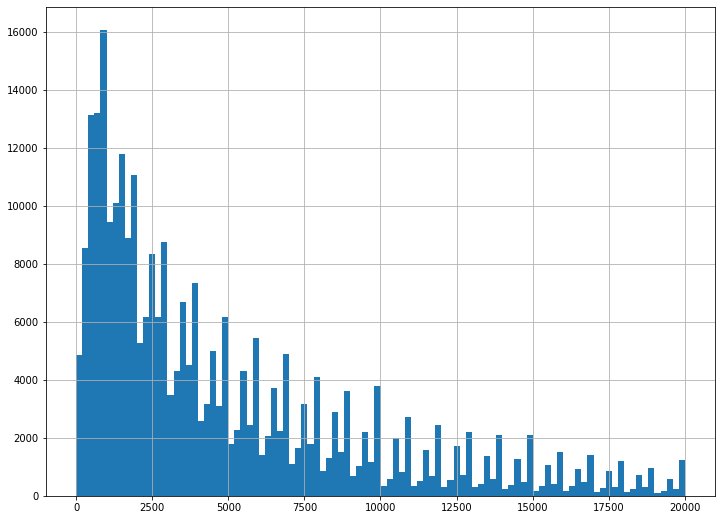

In [17]:
data_new['Price'].hist(bins=100, figsize=(12,9))

Посмотрим на разбросы

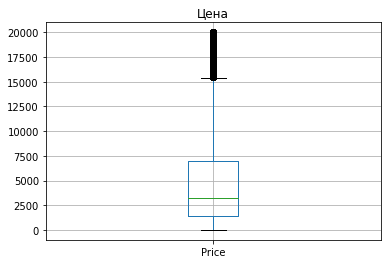

In [18]:
data_new['Price'].plot(kind='box', title='Цена', grid= True)
plt.show()

По адекватности цен и большим разбросам после 7 000 установим квантили (5 и 75%)

In [19]:
data_new['Price'].quantile([.05, 0.75])

0.05     450.0
0.75    7000.0
Name: Price, dtype: float64

In [20]:
data_new = data_new.query('450 <= Price <= 7000')

Power — мощность (л. с.) - это также важные данные для обучения. Построим гистограмму по столбцу.

count    205074.000000
mean        113.423447
std         190.090321
min           1.000000
25%          75.000000
50%         103.000000
75%         136.000000
max       20000.000000
Name: Power, dtype: float64

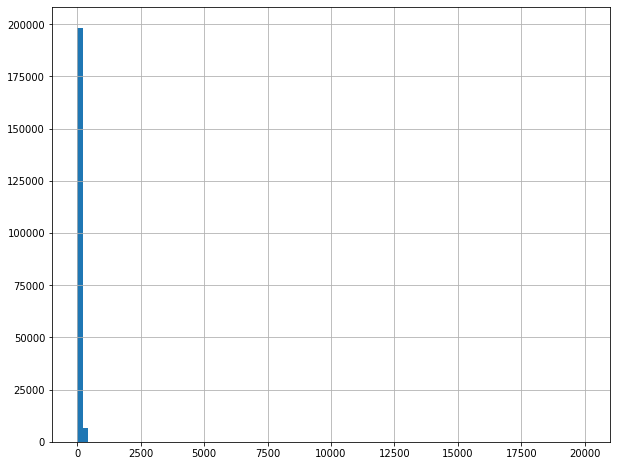

In [21]:
data_new['Power'].hist(bins=100, figsize=(10,8))
data_new['Power'].describe()

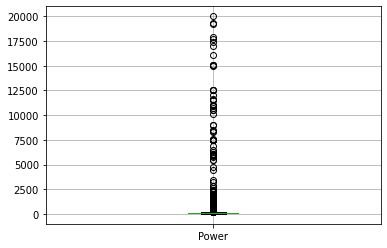

In [22]:
data_new['Power'].plot(kind='box', grid= True)
plt.show()

В данных много выбросов, удалим все что больше 400 л.с.

In [23]:
data_new = data_new.query('50 < Power < 400')
data_new['Power'].describe()

count    197631.000000
mean        111.893165
std          42.845956
min          51.000000
25%          75.000000
50%         105.000000
75%         136.000000
max         399.000000
Name: Power, dtype: float64

Итак, еще необходимо посмотреть на корреляцию.

<AxesSubplot:>

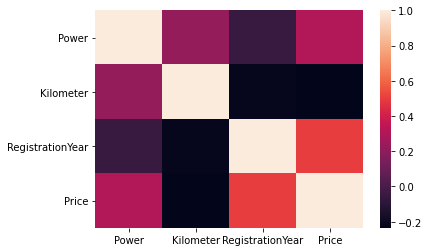

In [24]:
corr = data_new.corr()
sns.heatmap(corr)

Корелляция в пределах нормы.

Подготовим выборки для обучения моделей.

Определим признаки и разделим на тестовою и обучающую выборки.

In [25]:
features = data_new.drop('Price', axis=1)
target = data_new['Price']
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=12345)

In [26]:
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(148223, 9)
(49408, 9)
(148223,)
(49408,)


In [27]:
!pip install -U scikit-learn

In [28]:
# категориальные признаки для OHE 
ohe_features = features_train.select_dtypes(include='object').columns.to_list()
print(ohe_features)

['VehicleType', 'Gearbox', 'FuelType', 'Brand', 'Repaired', 'Model']


In [29]:
encoder_ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

In [30]:
encoder_ohe.fit(features_train[ohe_features])

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False,
              sparse_output=False)

In [31]:
features_train[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(features_train[ohe_features])

In [32]:
features_train = features_train.drop(ohe_features, axis=1)

In [33]:
scaler = StandardScaler()

In [36]:
features_train.head()

,Power,Kilometer,RegistrationYear,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,VehicleType_wagon,...,Model_wrangler,Model_x_reihe,Model_x_trail,Model_x_type,Model_xc_reihe,Model_yaris,Model_yeti,Model_ypsilon,Model_z_reihe,Model_zafira
309934,75,80000,2008,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
333502,125,150000,1996,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254352,163,150000,2000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
180238,231,150000,2000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61271,102,150000,2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
features_test[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(features_test[ohe_features])

features_test = features_test.drop(ohe_features, axis=1)

In [43]:
features_train.shape, features_test.shape

((148223, 299), (49408, 299))

In [44]:
(features_train.columns != features_test.columns).sum()

0

Масштабируем признаки

In [37]:
numeric = ['RegistrationYear', 'Power', 'Kilometer']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Выводы. Данные изучены, проведена предобработка.
- Обработаны пропуски в данных: VehicleType и FuelType (заполнены по моделям авто по популярности); Gearbox (заполнен популярным типом – manual, ручным); пропущенные данные по моделям заполнили неизвестным; Repaired – пропуски заполнили 'no' (не был в ремонте)
- Удалены столбцы, которые не потребуются в обучении: NumberOfPictures (0 значения в данных), PostalCode — почтовый индекс владельца анкеты (пользователя), LastSeen — дата последней активности пользователя, RegistrationMonth — месяц регистрации автомобиля, DateCrawled.
- Обработаны аномальные значения в количественных данных: в столбце RegistrationYear год регистрации не может быть больше 2020, и не может быть меньше 1930 (ограничили в пределах этих данных); в данных мощности Power много выбросов (ограничили 50 и 400 л.с.); значения из столбца Price обладают высоким стандартным отклонениям (Ограничили значениями по 5% и 75% квантилям – от 450 до 7 000).
- Проверена корреляция.
- Подготовлены выборки для обучения (разделены выборки на обучающую и тестовую, определен целевой признак, закодированы категориальные признаки, проведено масштабирование числовых признаков).

## Обучение моделей

Напишем функцию для расчета метрики RMSE.

In [38]:
from sklearn.metrics import mean_squared_error
def RMSE(target, predict):
    return (mean_squared_error(target, predict))**0.5
   
RMSE_score = make_scorer(RMSE, greater_is_better=False)

Обучим разные модели, одна из которых — LightGBM. Дополнительно, для задачи лучшим вариантом будет - линейная регрессия LinearRegression и случайный лес RandomForestRegressor. 

Линейная регрессия. LinearRegression.

In [45]:
%%time

regression_model = LinearRegression()
regression_model.fit(features_train, target_train)
regression_model_predictions = regression_model.predict(features_train)

# RMSE
regression_RMSE = round(RMSE(target_train, regression_model_predictions), 3)
print('RMSE Линейной регрессии:', regression_RMSE)

RMSE Линейной регрессии: 1195.311
CPU times: user 20.6 s, sys: 23.8 s, total: 44.4 s
Wall time: 44.4 s


Случайный лес. RandomForestRegressor.

In [46]:
%%time

forest = RandomForestRegressor()

forest_parametrs = { 'n_estimators': range(5, 20, 5),
                     'max_depth': range(1, 8, 2),
                     'min_samples_leaf': range(1, 4),
                     'min_samples_split': range(2, 6, 2) }

#GridSearchCV с кросс-валидацией
forest_grid = GridSearchCV(forest, forest_parametrs, scoring=RMSE_score, cv=3)
forest_grid.fit(features_train, target_train)

CPU times: user 16min 14s, sys: 35.5 s, total: 16min 49s
Wall time: 16min 50s


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(1, 8, 2),
                         'min_samples_leaf': range(1, 4),
                         'min_samples_split': range(2, 6, 2),
                         'n_estimators': range(5, 20, 5)},
             scoring=make_scorer(RMSE, greater_is_better=False))

Определим лучшие параметры

In [47]:
forest_params = forest_grid.best_params_
forest_score = forest_grid.score(features_train, target_train) * (-1)
print(forest_params)
print(forest_score)

{'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 15}
1091.7391095764212


Градиентный бустинг. LightGBM

In [48]:
from lightgbm import LGBMRegressor

In [49]:
%%time

lg = LGBMRegressor()
# словарь с набором параметров
lg_parametrs = {"max_depth": [10, 40, 50],
               "learning_rate" : [0.1, 0.2],
               "num_leaves": [60, 300],
               "n_estimators": range (5, 15, 5)
             }
# GridSearchCV с кросс-валидацией
lg_grid = GridSearchCV(lg, lg_parametrs, scoring=RMSE_score, cv=3)
lg_grid.fit(features_train, target_train)

CPU times: user 25min 38s, sys: 34 s, total: 26min 12s
Wall time: 26min 19s


GridSearchCV(cv=3, estimator=LGBMRegressor(),
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [10, 40, 50],
                         'n_estimators': range(5, 15, 5),
                         'num_leaves': [60, 300]},
             scoring=make_scorer(RMSE, greater_is_better=False))

In [50]:
%%time

lg_params = lg_grid.best_params_
lg_score = lg_grid.score(features_train, target_train) * (-1)
print(lg_params)
print(lg_score)

{'learning_rate': 0.2, 'max_depth': 40, 'n_estimators': 10, 'num_leaves': 300}
916.5468497496529
CPU times: user 691 ms, sys: 170 ms, total: 862 ms
Wall time: 808 ms


Изучим время обучения и предсказания по моделям с параметрами

Линейная регрессия. LinearRegression.

In [52]:
%%time

regression_model = LinearRegression()
regression_model.fit(features_train, target_train)

CPU times: user 14.5 s, sys: 14.5 s, total: 29 s
Wall time: 29 s


LinearRegression()

In [53]:
%%time

regression_model_predictions = regression_model.predict(features_train)

# RMSE
regression_RMSE = round(RMSE(target_train, regression_model_predictions), 3)
print('RMSE Линейной регрессии:', regression_RMSE)

RMSE Линейной регрессии: 1195.311
CPU times: user 93.1 ms, sys: 20.3 ms, total: 113 ms
Wall time: 73.8 ms


Случайный лес. RandomForestRegressor.

In [54]:
%%time

forest_model = RandomForestRegressor(random_state=12345,
                                     max_depth=forest_params['max_depth'],
                                     min_samples_leaf = forest_params['min_samples_leaf'],
                                     min_samples_split = forest_params['min_samples_split'],
                                     n_estimators = forest_params['n_estimators'])

forest_model.fit(features_train, target_train)

CPU times: user 18.1 s, sys: 101 ms, total: 18.2 s
Wall time: 18.3 s


RandomForestRegressor(max_depth=7, min_samples_leaf=2, n_estimators=15,
                      random_state=12345)

In [55]:
%%time

forest_model_predictions = forest_model.predict(features_train)

# RMSE
forest_RMSE = mean_squared_error(target_train, forest_model_predictions) ** 0.5
print('RMSE модели Случайного леса:', forest_RMSE)

RMSE модели Случайного леса: 1091.7467708127783
CPU times: user 194 ms, sys: 47.2 ms, total: 241 ms
Wall time: 239 ms


Градиентный бустинг. LightGBM

In [59]:
%%time

# с гиперпараметрами
lg_model = LGBMRegressor(max_depth= lg_params['max_depth'],
                             learning_rate = lg_params['learning_rate'],
                             num_leaves = lg_params['num_leaves'],
                             n_estimators = lg_params['n_estimators'])

lg_model.fit(features_train, target_train)

CPU times: user 5min 33s, sys: 3.76 s, total: 5min 36s
Wall time: 5min 38s


LGBMRegressor(learning_rate=0.2, max_depth=40, n_estimators=10, num_leaves=300)

In [60]:
%%time

lg_model_predictions = lg_model.predict(features_train)

lg_RMSE = mean_squared_error(target_train, lg_model_predictions) ** 0.5
print('RMSE модели LGBMRegressor:', lg_RMSE)

RMSE модели LGBMRegressor: 916.5468497496529
CPU times: user 635 ms, sys: 199 ms, total: 834 ms
Wall time: 836 ms


In [62]:
predictions_test = lg_model.predict(features_test)
rmse_test = mean_squared_error(target_test, predictions_test) ** 0.5
rmse_test

933.9274435447953

## Анализ моделей

In [80]:
columns = ['Модель', 'Время обучения, сек', 'Время предсказания, сек', 'RMSE']
regression_model = ['Линейная регрессия', 29, 0.074, regression_RMSE]
forest_model = ['Случайный лес', 18.3, 0.24, forest_RMSE]
lg_model = ['LGBMRegressor', 322.8, 10.8, lg_RMSE]

table = pd.DataFrame([forest_model, regression_model, lg_model], columns = columns)

display(table)

,Модель,"Время обучения, сек","Время предсказания, сек",RMSE
0,Случайный лес,18.3,0.240,1091.746771
1,Линейная регрессия,29.0,0.074,1195.311000
2,LGBMRegressor,322.8,10.800,916.546850


Итак, были обучены и проверены 3 модели: Линейная регрессия, Случайный лес, LGBMRegressor. Лучшие результаты по качеству показала модель LGBMRegressor, при параметрах learning_rate=0.2, max_depth=40, n_estimators=10, num_leaves=300 удалось достигнуть RMSE 916.54, однако время обучения длительное - 322,8 с. При тестировании результат: 933.9.

# Тестирование лучшей модели

Таким образом, в ходе работы было произведена загрузка данных, ознакомление со статистическим набором показателей, подготовка и обучение моделей, анализ результатов. 

- Обработаны пропуски в данных: VehicleType, FuelType, Gearbox, Repaired.
- Удалены столбцы, которые не потребовались в обучении.
- Обработаны аномальные значения в количественных данных.
- Проверена корреляция.
- Подготовлены выборки для обучения (разделены выборки на обучающую и тестовую, определен целевой признак, закодированы категориальные признаки, проведено масштабирование числовых признаков).
- GridSearchCV с кросс-валидацией подобраны гиперпараметры для моделей: Линейная регрессия, Случайный лес, LGBMRegressor.
- Произведена проверка на тестовой выборке.

В итоге, лучшие результаты по качеству показала модель LGBMRegressor, при параметрах learning_rate=0.2, max_depth=40, n_estimators=10, num_leaves=300 удалось достигнуть RMSE 916.54, однако время обучения длительное - 322,8 с. При тестировании результат: 933.9. Однако при небольшой разнице RMSE с моделью случайного леса - 1091.74. И при времени обучения модели в 18.3 с., результат модели вполне логично считать лучшим.
Для работы заказчику рекомендуется все же применять модель на основе RandomForestRegressor.